# Nearest Neighbors Classification

In [59]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.patches as mpatches

pd.options.display.max_columns = 50

## 1. Importando Dados Originais

In [60]:
originalDataset = pd.read_csv('bank_bank-full.csv', sep=';')
originalDataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### 1.1. Informações dos Dados

#### Dados bancários do Cliente:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

#### Relacionado com o último contato da campanha atual:

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day: last contact day of the week (numeric)

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign.

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

#### Variável de Saída (Alvo Desejado):

16 - y : has the client subscribed a term deposit? (binary: 'yes','no')

## 2. Importando Dados Tratados

In [61]:
dataset = pd.read_csv('dataset.csv')
dataset.head()

,age,default,balance,housing,loan,day,month,campaign,pdays,previous,aceitaram,month_number,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown
0,58,0,2143,1,0,5,5,1,-1,0,0,5,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,5,1,-1,0,0,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1
2,33,0,2,1,1,5,5,1,-1,0,0,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
3,47,0,1506,1,0,5,5,1,-1,0,0,5,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
4,33,0,1,0,0,5,5,1,-1,0,0,5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1


## 3. Preparando dataset

1. Remover atributo target (aceitaram) do dataset X (usando drop)
2. Obter coluna target do dataset
3. Separar dados de treino de dados de teste (nesse caso 77% para treino e 33% para teste)

In [62]:
X = dataset.drop('aceitaram',axis=1)
y = dataset['aceitaram']
X_train, X_test, y_train, y_test = train_test_split(X.values,y,test_size=0.33,random_state=42)

## 4. Criando o Modelo

1. Definir o método de aprendizagem ("k" vizinhos mais próximos)
2. Definir hiperparâmetros (inicialmente default)
3. "Ajustar" modelo (.fit) com os dados de treino

In [63]:
neigh = neighbors.KNeighborsClassifier()
neigh = neigh.fit(X_train, y_train)

## 5. Testando o Modelo

1. Com o modelo criado, a partir dos dados de treino, pode-se testar o modelo com os dados de teste


2. Aplicando os dados de teste é possível verificar o desempenho do modelo

    * **precision**: A precisão é a capacidade de um classificador de não rotular uma instância positiva que seja realmente negativa."Para todas as instâncias classificadas como positivas, qual porcentagem estava correta?" precision = tp/(tp+fp)

    * **recall**: É a capacidade de um classificador para encontrar todas as instâncias positivas. Para cada classe, é definida como a proporção de verdadeiros positivos para a soma de verdadeiros positivos e falsos negativos. "Para todas as instâncias que foram realmente positivas, qual porcentagem foi classificada corretamente?" recall = tp/(tp+fn)

    * **f1-score**: É uma média harmônica ponderada de precision e recall de tal forma que o melhor escore é 1,0 e o pior é 0,0. De um modo geral, as pontuações F1 são inferiores às medidas de precisão.

    * **support**:Suporte é o número de ocorrências reais da classe no conjunto de dados especificado.


3. Verificando desempenho:
    * **Informações dos Dados de Teste**: O total de observações de teste que disseram não está em torno de 88% enquanto os que aceitaram, disseram sim, é de apenas 12%.

    * **precision**: Para a classe de obervações sim, o classificador obteve uma precisão de 41%. Para a classe de pessoas que responderam não, o classificador obteve uma precisão de 89%. O Resultado da precisão do modelo, sem nenhuma variação de parâmetros, ou seja, com os parâmetros default do modelo é de 83%. Em outras palavras quando o modelo prevê que uma observação será aceita, o modelo estará certo 41% das vezes, por outro lado quando o modelo prevê que uma observação será recusada ele está certo 89% das vezes.

    * **recall**: De todas as observações que eram realmente "Aceita" 11% foram identificadas pelo modelo, da mesma forma, das observações que eram realmente "Recusada" 98% foram identificadas pelo modelo. Resultando em 87% do total realmente era o que foi predito pelo modelo. Dessa forma, identifica 98% das vezes que a observação será recusada(de todas as observações realmente recusadas) e 11% quando serão aceitas (de todas as observações realmente aceitas).

In [64]:
y_predict = neigh.predict(X_test)

pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted Not Accept', 'Predicted Accept'],
    index=['True Not Accept', 'True Accept']
)

,Predicted Not Accept,Predicted Accept
True Not Accept,12865,269
True Accept,1597,189


In [65]:
print(classification_report(
    y_test,
    y_predict,
    target_names=['Recusaram','Aceitaram'],
    digits=7))

print("Accuracy Score: " + str(accuracy_score(y_test, y_predict)))

              precision    recall  f1-score   support

   Recusaram  0.8895727 0.9795188 0.9323815     13134
   Aceitaram  0.4126638 0.1058231 0.1684492      1786

   micro avg  0.8749330 0.8749330 0.8749330     14920
   macro avg  0.6511182 0.5426709 0.5504154     14920
weighted avg  0.8324842 0.8749330 0.8409349     14920

Accuracy Score: 0.8749329758713137


## 6. Variando hiperparâmetros básicos

1. Variação de parâmetros:

    * **n_neighbors**: Number of neighbors to use by default for kneighbors queries. (default=5)
    * **weights**: weight function used in prediction. Possible values: ‘uniform’ -> uniform weights. All points in each neighborhood are weighted equally. ‘distance’ -> weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. \[callable\] -> a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights. (default='uniform')
    * **algorithm**: Algorithm used to compute the nearest neighbors: ‘ball_tree’ -> will use BallTree. ‘kd_tree’ -> will use KDTree. ‘brute’ -> will use a brute-force search. ‘auto’ -> will attempt to decide the most appropriate algorithm based on the values passed to fit method.
    * **leaf_size**: Leaf size passed to BallTree or KDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem. (default=30)
    * **p**: Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used. (default=2)
    * **metric**: The distance metric to use for the tree. The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric. See the documentation of the DistanceMetric class for a list of available metrics. (default=‘minkowski’)
    * **metric_params**: Additional keyword arguments for the metric function. (default = None)
    * **n_jobs**: The number of parallel jobs to run for neighbors search. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details. Doesn’t affect fit method. (default=None)

In [66]:
neigh = neighbors.KNeighborsClassifier(n_neighbors=5,
                                       weights='distance',
                                       algorithm='auto',
                                       n_jobs=-1)
neigh = neigh.fit(X_train, y_train)

## 7. Verificando desempenho com hiperparâmetros modificados

3. Verificando desempenho:
    * **precision**: O modelo foi um pouco mais preciso nos Recusados, contudo, um pouco menos preciso nos que Aceitaram. Contudo, essa mudança não foi muito significativa.

    * **recall**: O recall dos que Aceitaram aumentou em torno de 1%.

In [67]:
y_predict = neigh.predict(X_test)

pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted Not Accept', 'Predicted Accept'],
    index=['True Not Accept', 'True Accept']
)

,Predicted Not Accept,Predicted Accept
True Not Accept,12822,312
True Accept,1570,216


In [68]:
print(classification_report(
    y_test,
    y_predict,
    target_names=['Recusaram','Aceitaram'],
    digits=7))

print("Accuracy Score: " + str(accuracy_score(y_test, y_predict)))

              precision    recall  f1-score   support

   Recusaram  0.8909116 0.9762449 0.9316283     13134
   Aceitaram  0.4090909 0.1209406 0.1866897      1786

   micro avg  0.8738606 0.8738606 0.8738606     14920
   macro avg  0.6500013 0.5485928 0.5591590     14920
weighted avg  0.8332352 0.8738606 0.8424553     14920

Accuracy Score: 0.8738605898123324


## 8. Verificando desempenho por variação de n_neighbors

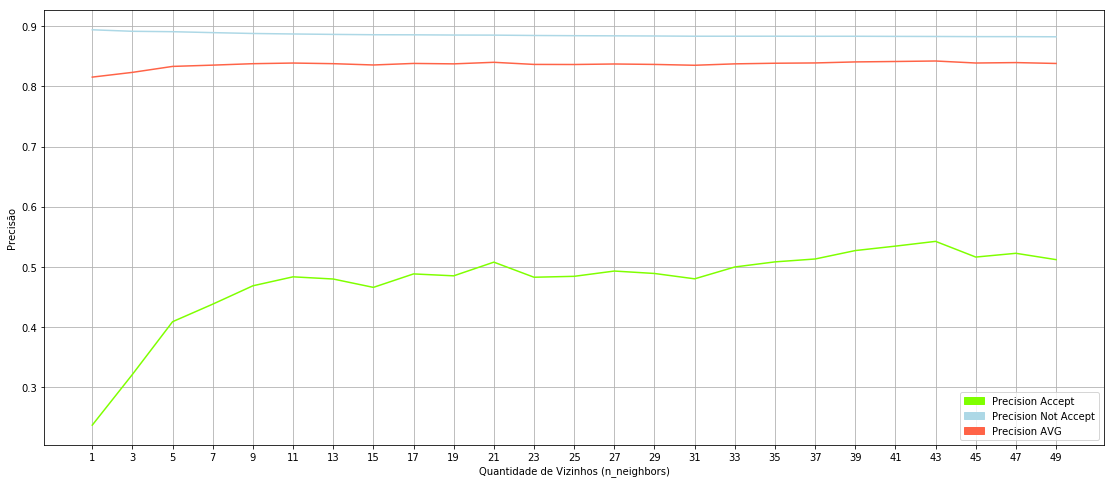

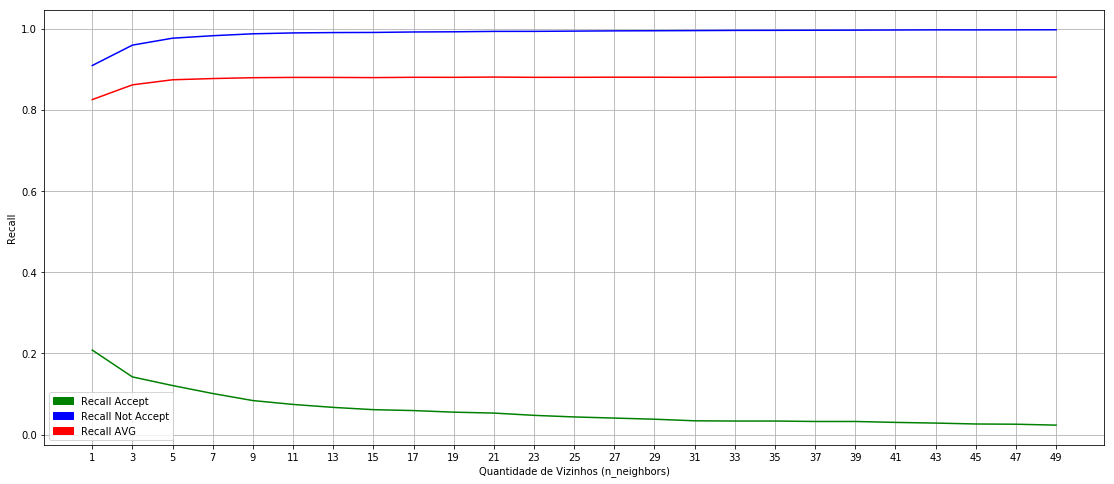

In [69]:
report_precision_not_accept = []
report_recall_not_accept = []

report_precision_accept = []
report_recall_accept = []

report_precision_avg = []
report_recall_avg = []

report_accept_variation_print = []

numbers_list = list(range(1,50))
odd_values = list(filter(lambda x: x % 2 != 0, numbers_list))

for n_neighbors in odd_values:
    report_accept_variation_print.append("K: " + str(n_neighbors))
    neigh = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors,
                                           weights='distance',
                                           algorithm='auto',
                                           n_jobs=-1)
    neigh = neigh.fit(X_train, y_train)
    y_predict = neigh.predict(X_test)

    report = classification_report(y_test,
                                   y_predict,
                                   target_names=['Recusaram','Aceitaram'],
                                   digits=3,
                                   output_dict=True)

    report_precision_not_accept.append(report['Recusaram']['precision'])
    report_recall_not_accept.append(report['Recusaram']['recall'])
    report_precision_accept.append(report['Aceitaram']['precision'])

    report_accept_variation_print.append("Aceitaram - Precision: " + str(report['Aceitaram']['precision']))

    report_recall_accept.append(report['Aceitaram']['recall'])

    report_accept_variation_print.append("Aceitaram - Recall: " + str(report['Aceitaram']['recall']))

    report_precision_avg.append(report['weighted avg']['precision'])
    report_recall_avg.append(report['weighted avg']['recall'])
    

max_samples = odd_values

plt.figure(figsize=(19,8))

plt.grid()

plt.xticks(max_samples)

plt.plot(max_samples, report_precision_accept, 'chartreuse', label='Precision Accept')

plt.plot(max_samples, report_precision_not_accept, 'lightblue', label='Precision Not Accept')

plt.plot(max_samples, report_precision_avg, 'tomato', label='Precision AVG')

plt.ylabel('Precisão')
plt.xlabel('Quantidade de Vizinhos (n_neighbors)')

plt.legend(handles=[mpatches.Patch(color='chartreuse', label='Precision Accept'),
mpatches.Patch(color='lightblue', label='Precision Not Accept'),
mpatches.Patch(color='tomato', label='Precision AVG')])

plt.show()

plt.figure(figsize=(19,8))

plt.grid()

plt.xticks(max_samples)

plt.plot(max_samples, report_recall_accept, 'green', label='Recall Accept')

plt.plot(max_samples, report_recall_not_accept, 'blue', label='Recall Not Accept')

plt.plot(max_samples, report_recall_avg, 'red', label='Recall AVG')

plt.ylabel('Recall')
plt.xlabel('Quantidade de Vizinhos (n_neighbors)')

plt.legend(handles=[mpatches.Patch(color='green', label='Recall Accept'),
mpatches.Patch(color='blue', label='Recall Not Accept'),
mpatches.Patch(color='red', label='Recall AVG')])
plt.show()

In [70]:
for line in report_accept_variation_print:
    print(line)

K: 1
Aceitaram - Precision: 0.2372448979591837
Aceitaram - Recall: 0.20828667413213886
K: 3
Aceitaram - Precision: 0.32151898734177214
Aceitaram - Recall: 0.1422172452407615
K: 5
Aceitaram - Precision: 0.4090909090909091
Aceitaram - Recall: 0.12094064949608063
K: 7
Aceitaram - Precision: 0.43825665859564167
Aceitaram - Recall: 0.1013437849944009
K: 9
Aceitaram - Precision: 0.46875
Aceitaram - Recall: 0.083986562150056
K: 11
Aceitaram - Precision: 0.48363636363636364
Aceitaram - Recall: 0.07446808510638298
K: 13
Aceitaram - Precision: 0.48
Aceitaram - Recall: 0.0671892497200448
K: 15
Aceitaram - Precision: 0.4661016949152542
Aceitaram - Recall: 0.06159014557670773
K: 17
Aceitaram - Precision: 0.48847926267281105
Aceitaram - Recall: 0.0593505039193729
K: 19
Aceitaram - Precision: 0.4852941176470588
Aceitaram - Recall: 0.055431131019036954
K: 21
Aceitaram - Precision: 0.5080213903743316
Aceitaram - Recall: 0.05319148936170213
K: 23
Aceitaram - Precision: 0.48295454545454547
Aceitaram - Re

## 9. Verificando desempenho com n_neighbors = 11

In [77]:
neigh = neighbors.KNeighborsClassifier(n_neighbors=11,
                                       weights='distance',
                                       algorithm='auto',
                                       n_jobs=-1)
neigh = neigh.fit(X_train, y_train)

3. Verificando desempenho:
    * **precision**: O modelo foi em torno 8% mais preciso nos Aceitaram, contudo, um pouco menos preciso nos que Recusaram.

    * **recall**: O recall dos que Aceitaram diminuiu em torno de 0.0464725%.

In [78]:
y_predict = neigh.predict(X_test)

pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted Not Accept', 'Predicted Accept'],
    index=['True Not Accept', 'True Accept']
)

,Predicted Not Accept,Predicted Accept
True Not Accept,12992,142
True Accept,1653,133


In [79]:
print(classification_report(
    y_test,
    y_predict,
    target_names=['Recusaram','Aceitaram'],
    digits=7))

print("Accuracy Score: " + str(accuracy_score(y_test, y_predict)))

              precision    recall  f1-score   support

   Recusaram  0.8871287 0.9891884 0.9353828     13134
   Aceitaram  0.4836364 0.0744681 0.1290636      1786

   micro avg  0.8796917 0.8796917 0.8796917     14920
   macro avg  0.6853825 0.5318282 0.5322232     14920
weighted avg  0.8388286 0.8796917 0.8388623     14920

Accuracy Score: 0.8796916890080428
